In [144]:
 # import libraries
import numpy as  np
import pandas as pd
import  array
import matplotlib.pyplot as plt
import importlib.util
from matplotlib.colors import ListedColormap
import array
import sklearn
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import warnings
import csv
warnings.filterwarnings('ignore')

In [145]:
# importing template file 
spec = importlib.util.spec_from_file_location("Template", "/home/admin1/PycharmProjects/Basic Python/myprograms/WEEK_10/UtilityTemplate/UtilTemplate.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
log_template = foo.Template()

In [146]:
# importing datasets
dataset = pd.read_csv('/home/admin1/PycharmProjects/Basic Python/myprograms/WEEK_10/Logistic Regression/Datasets/Social_Network_Ads.csv')

In [147]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [148]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 400 rows and 5 Columns


In [149]:
dataset.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
138,15610403,Female,28,59000,0


In [150]:
# checking information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [151]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [152]:
# checking null values in dataset
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [153]:
# check for minimum dataset
dataset.min()

User ID            15566689
Gender               Female
Age                      18
EstimatedSalary       15000
Purchased                 0
dtype: object

In [154]:
# # split dataset into train and test set
train,test  =  log_template.split_datasets(dataset,0.20)
train.shape,test.shape

((320, 5), (80, 5))

In [155]:
# saving train data in csv file
train_csv  =  log_template.save_csv(train,'CSV_Files/train.csv')

In [156]:
# saving test data in csv file
test_csv =  log_template.save_csv(test,'CSV_Files/test.csv')

In [157]:
# reading train.csv for further operation on it
train_file  = log_template.read_csv('CSV_Files/train.csv')

In [158]:
# Split train.csv data into Train and cross validation 
train_data,cross_val = log_template.split_datasets(train_file,0.30)

In [159]:
train_data.shape,cross_val.shape

((224, 5), (96, 5))

In [160]:
# saving cross validation data in csv file
cv_file = log_template.save_csv(cross_val,'CSV_Files/cross_validation.csv')

In [161]:
# reading cross validation file
cv_data = log_template.read_csv('CSV_Files/cross_validation.csv')

In [162]:
# seperating features and label from train data
x_train = train_data.iloc[:,[2,3]].values
y_train = train_data.iloc[:,4].values

In [163]:
# seperating features and label from cv data
x_cv = cv_data.iloc[:,[2,3]].values
y_cv = cv_data.iloc[:,4].values

In [164]:
# reshape y column of train data
y_train =y_train.reshape(-1,1)
x_train.shape,y_train.shape

In [165]:
# # reshape y column of  cv data
y_cv = y_cv.reshape(-1,1)
x_cv.shape,y_cv.shape
# x_cv = np.array(x_cv)

((96, 2), (96,))

In [166]:
# perform scaling operation on x train data
# x_train,scale_obj = log_template.feature_scaling(x_train)

In [167]:
# perform scaling operation on x_cv of cross validation
# x_cv,scale_obj_cv = log_template.feature_scaling(x_cv)

Model Fitted
Model performane on train data:
 [[148   0]
 [  0  76]]
Model performance on cross validation:
 [[54  4]
 [ 8 30]]
Accuracy on Train: 100.0
Accuracy on cross validation: 86.02540834845736


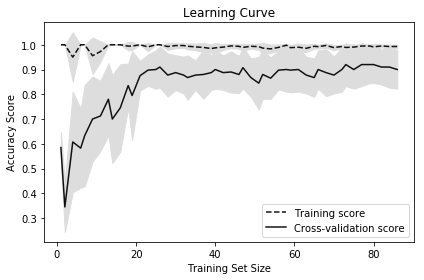

In [172]:
class Training_Random_Forest():
    
    def fit_model(self,x,y):
        return log_template.Fit_Model_RandomForest(x,y)
    
    def prediction(self,train,classifier):
        return  log_template.prediction_classifier(train,classifier)
    
    def get_confusion_matrix(self,train,predicted):
        return confusion_matrix(train,predicted)
        
    def get_accuracy(self,y,y_predicted):
        return  sklearn.metrics.balanced_accuracy_score(y,y_predicted)*100
        
    def visualization_learning_curve(self,X,y,classifier):
        train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

        # Create means and standard deviations of training set scores
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)

        # Create means and standard deviations of test set scores
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Draw lines
        plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
        plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

        # Draw bands
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

        # Create plot
        plt.title("Learning Curve")
        plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
        plt.tight_layout()
        plt.show() 
        
def main():
# instantiation of class
    obj = Training_Random_Forest()
#     fitting train model
    classifier = obj.fit_model(x_train,y_train)
    print("Model Fitted")
#     prediction over train model by x_train data
    prediction_train = obj.prediction(x_train,classifier)
#     confusion matrix for describe performance of classification model
    train_cf_matrix = obj.get_confusion_matrix(y_train,prediction_train)
    print("Model performane on train data:\n",train_cf_matrix)

#     predict cross validation on model
    prediction_cv =  obj.prediction(x_cv,classifier)
    cv_cf_matrix  = obj.get_confusion_matrix(y_cv,prediction_cv)
    print("Model performance on cross validation:\n",cv_cf_matrix)
    
#     getting accuracy on train data  and cross validation
    train_accuracy = obj.get_accuracy(y_train,prediction_train)
    print("Accuracy on Train:",train_accuracy)
    cv_accuracy = obj.get_accuracy(y_cv,prediction_cv)
    print("Accuracy on cross validation:",cv_accuracy)
    
    # Setting threshold limit where we get accuracy greater than 80%
    # then save our model in pickle file  
    if train_accuracy or cv_accuracy > 80:
        file = open('Pickle File/TrainPickle.pkl', 'wb')
        pickle.dump(classifier,file)
        pickle.dump(scale_obj,file)
        file.close()     

    obj.visualization_learning_curve(x_cv,y_cv,classifier)

if __name__ == '__main__':
    main()